## Feature Engineering

In [1]:
import pandas as pd
import featuretools as ft

In [2]:
df_anp = pd.read_pickle('../../data/Visual_well_being/anp.pickle')
df_celeb = pd.read_pickle('../../data/Visual_well_being/celebrity.pickle')
df_face = pd.read_pickle('../../data/Visual_well_being/face.pickle')
df_img_data = pd.read_pickle('../../data/Visual_well_being/image_data.pickle')
df_img_metrics = pd.read_pickle('../../data/Visual_well_being/image_metrics.pickle')
df_object = pd.read_pickle('../../data/Visual_well_being/object_labels.pickle')
df_survey = pd.read_pickle('../../data/Visual_well_being/survey.pickle')

In [3]:
import sys
lib_dir = "../../libs/"
if lib_dir not in sys.path:
    sys.path.append(lib_dir)

In [4]:
import image_level_agg_features as img_f
import user_level_agg_features as usr_f

In [5]:
# Create new entityset
es = ft.EntitySet(id = 'users')

In [6]:
df_survey.head()

,index,id,gender,born,education,employed,income,A_2,N_1,P_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
22,44,d3cbd581e36ca09964db98869893bb3c,Female,1974,High school graduate,A homemaker,"$40,000 to $49,999",6,2,4,...,3.000000,5.333333,3.666667,5.333333,5.333333,4.4375,3.000000,3.000000,1515.0,public
57,114,38ef7aa1fe951a299fc0ca399f2b7545,Female,1980,College graduate,Employed for wages,"$50,000 to $59,999",8,6,8,...,7.666667,8.333333,7.333333,7.666667,8.000000,7.8750,5.666667,7.666667,123.0,public
58,117,e96c67e535cb4dadfc2a7a15c95fc310,Male,1995,High school graduate,Out of work and looking for work,"$100,000 to $149,999",5,8,7,...,4.666667,8.000000,6.333333,4.666667,5.000000,5.6875,5.000000,4.666667,350.0,public
5,10,8393c367c91dbc479eb9bdb2e41e6eb5,Female,1979,High school graduate,Self-employed,"$100,000 to $149,999",7,8,10,...,10.000000,9.333333,10.000000,9.333333,7.666667,9.2500,3.333333,10.000000,609.0,public
26,63,908c12a6a174905349f0fe7e4d00ff2b,Female,1987,College graduate,Employed for wages,"$150,000 or more",7,8,6,...,6.333333,4.666667,8.333333,5.666667,8.333333,6.6250,4.333333,6.333333,64.0,public


In [7]:
df_survey = df_survey.drop_duplicates('insta_user_id')

In [8]:
df_img_data['image_posted_time'] = pd.to_datetime(df_img_data['image_posted_time'])

In [9]:
df_img_data['user_id'] = pd.to_numeric(df_img_data['user_id'])
df_survey['insta_user_id'] = pd.to_numeric(df_survey['insta_user_id'])

In [10]:
df_img_data_metrics = pd.merge(df_img_data, df_img_metrics, on='image_id')

In [11]:
#Create two FT entities

es = es.entity_from_dataframe(entity_id = 'users', dataframe = df_survey, 
                              index = 'insta_user_id')

es = es.entity_from_dataframe(entity_id = 'image_data_metrics', dataframe = df_img_data_metrics, make_index=True, 
                              variable_types = {'user_bio': ft.variable_types.Text, 'user_website': ft.variable_types.Text}, index='data_metric_id', time_index='comment_count_time_created')

In [12]:
# Relationship between users and images
r_user_img_data_metrics = ft.Relationship(es['users']['insta_user_id'],
                                    es['image_data_metrics']['user_id'])


# Add the relationship to the entity set
es = es.add_relationship(r_user_img_data_metrics)

In [14]:
# Perform deep feature synthesis without specifying primitives
features, feature_names = ft.dfs(entityset=es, target_entity='users', 
                                 max_depth = 2)

features.head()

,index,born,A_2,N_1,P_1,E_1,A_1,H_1,M_1,R_1,...,MODE(image_data_metrics.DAY(like_count_time_created)),MODE(image_data_metrics.YEAR(image_posted_time)),MODE(image_data_metrics.YEAR(comment_count_time_created)),MODE(image_data_metrics.YEAR(like_count_time_created)),MODE(image_data_metrics.MONTH(image_posted_time)),MODE(image_data_metrics.MONTH(comment_count_time_created)),MODE(image_data_metrics.MONTH(like_count_time_created)),MODE(image_data_metrics.WEEKDAY(image_posted_time)),MODE(image_data_metrics.WEEKDAY(comment_count_time_created)),MODE(image_data_metrics.WEEKDAY(like_count_time_created))
insta_user_id,,,,,,,,,,,,,,,,,,,,,
1619510,44,1974,6,2,4,7,4,3,5,4,...,19.0,2012.0,2017.0,2017.0,4.0,6.0,6.0,6.0,0.0,0.0
2829661,114,1980,8,6,8,8,7,8,7,7,...,19.0,2011.0,2017.0,2017.0,5.0,6.0,6.0,6.0,0.0,0.0
3069744,117,1995,5,8,7,8,7,5,5,7,...,19.0,2013.0,2017.0,2017.0,10.0,6.0,6.0,6.0,0.0,0.0
3988856,10,1979,7,8,10,10,9,8,8,10,...,19.0,2013.0,2017.0,2017.0,5.0,6.0,6.0,2.0,0.0,0.0
4185084,63,1987,7,8,6,6,8,10,5,9,...,19.0,2015.0,2017.0,2017.0,7.0,6.0,6.0,6.0,0.0,0.0


In [15]:
features.corr()

,index,born,A_2,N_1,P_1,E_1,A_1,H_1,M_1,R_1,...,MODE(image_data_metrics.DAY(like_count_time_created)),MODE(image_data_metrics.YEAR(image_posted_time)),MODE(image_data_metrics.YEAR(comment_count_time_created)),MODE(image_data_metrics.YEAR(like_count_time_created)),MODE(image_data_metrics.MONTH(image_posted_time)),MODE(image_data_metrics.MONTH(comment_count_time_created)),MODE(image_data_metrics.MONTH(like_count_time_created)),MODE(image_data_metrics.WEEKDAY(image_posted_time)),MODE(image_data_metrics.WEEKDAY(comment_count_time_created)),MODE(image_data_metrics.WEEKDAY(like_count_time_created))
index,1.000000,0.190554,-0.061303,0.147715,-0.061417,0.103024,0.091506,-0.007681,0.151566,-0.080725,...,0.440659,0.164045,NaN,NaN,-0.063339,NaN,NaN,-0.088571,0.440659,0.440659
born,0.190554,1.000000,-0.051642,-0.070319,0.024795,-0.228636,0.018088,0.063329,0.070327,-0.040136,...,0.090034,0.063055,NaN,NaN,0.111293,NaN,NaN,-0.012899,0.090034,0.090034
A_2,-0.061303,-0.051642,1.000000,-0.301719,0.401627,0.424567,0.530588,0.389454,0.431991,0.366002,...,-0.130464,0.017828,NaN,NaN,-0.022130,NaN,NaN,-0.007135,-0.130464,-0.130464
N_1,0.147715,-0.070319,-0.301719,1.000000,-0.258700,0.051631,-0.342879,-0.360201,-0.222909,-0.253774,...,0.060092,-0.117533,NaN,NaN,-0.065352,NaN,NaN,0.086261,0.060092,0.060092
P_1,-0.061417,0.024795,0.401627,-0.258700,1.000000,0.271720,0.547577,0.408032,0.504361,0.291757,...,0.000258,-0.015215,NaN,NaN,0.067707,NaN,NaN,-0.024343,0.000258,0.000258
E_1,0.103024,-0.228636,0.424567,0.051631,0.271720,1.000000,0.417093,0.182723,0.262060,0.192195,...,0.047267,-0.076652,NaN,NaN,-0.061108,NaN,NaN,-0.074864,0.047267,0.047267
A_1,0.091506,0.018088,0.530588,-0.342879,0.547577,0.417093,1.000000,0.511890,0.568652,0.301913,...,-0.032376,0.049311,NaN,NaN,0.003173,NaN,NaN,-0.111797,-0.032376,-0.032376
H_1,-0.007681,0.063329,0.389454,-0.360201,0.408032,0.182723,0.511890,1.000000,0.435193,0.347602,...,-0.038311,0.051172,NaN,NaN,0.043954,NaN,NaN,0.074368,-0.038311,-0.038311
M_1,0.151566,0.070327,0.431991,-0.222909,0.504361,0.262060,0.568652,0.435193,1.000000,0.350445,...,0.101910,0.013771,NaN,NaN,0.112329,NaN,NaN,-0.059403,0.101910,0.101910
R_1,-0.080725,-0.040136,0.366002,-0.253774,0.291757,0.192195,0.301913,0.347602,0.350445,1.000000,...,-0.097333,-0.054133,NaN,NaN,-0.080714,NaN,NaN,0.004685,-0.097333,-0.097333


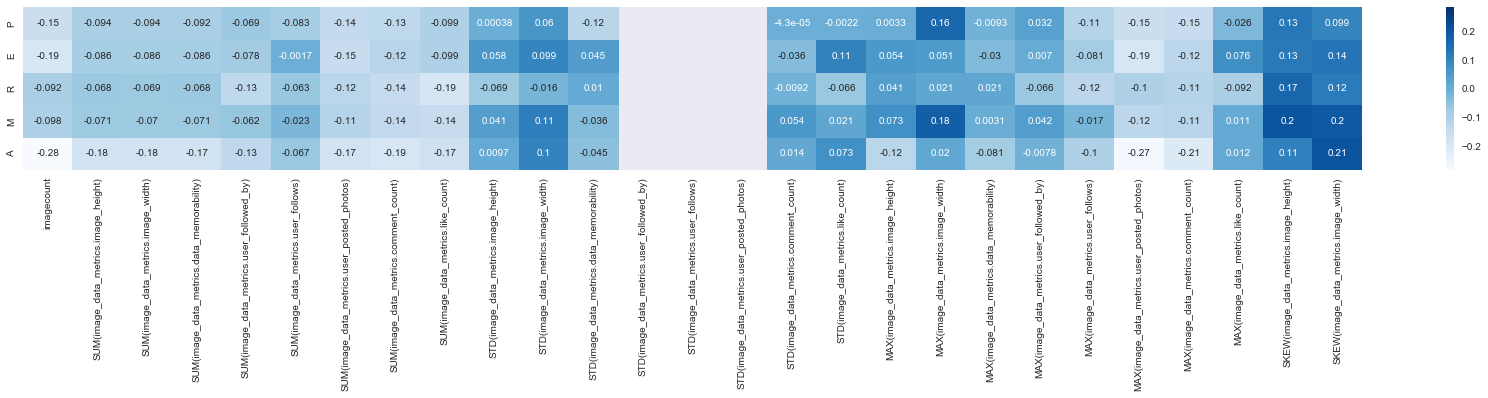

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(30,3))

sns.heatmap(features.corr().loc[['P', 'E', 'R', 'M', 'A'], :].iloc[:,33:60], cmap='Blues', annot=True)

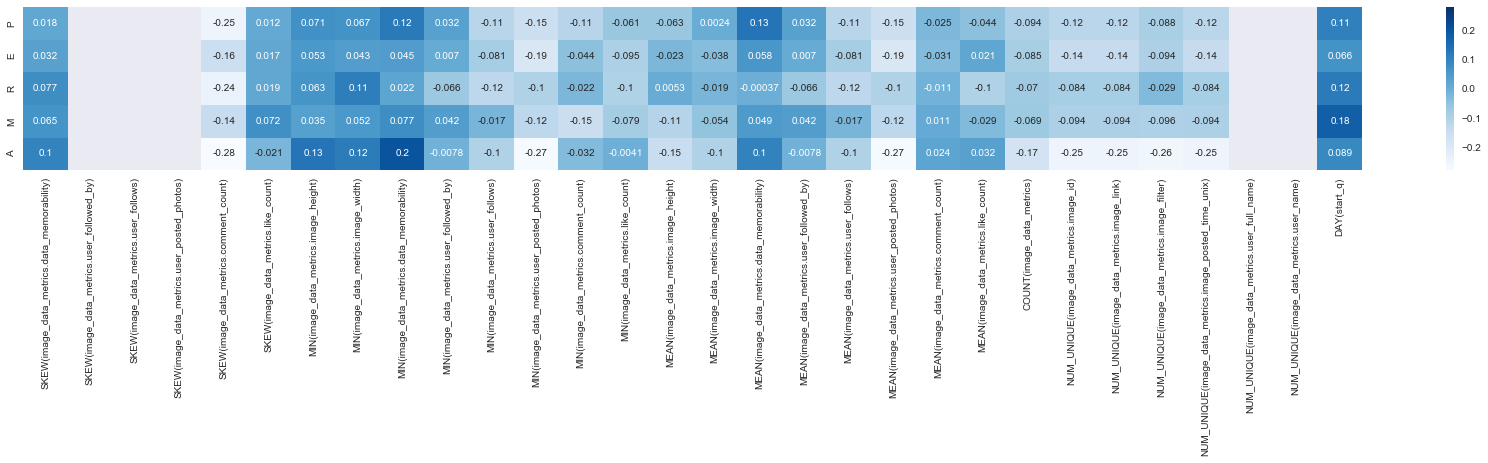

In [17]:
plt.figure(figsize=(30,3))

sns.heatmap(features.corr().loc[['P', 'E', 'R', 'M', 'A'], :].iloc[:,60:90], cmap='Blues', annot=True)

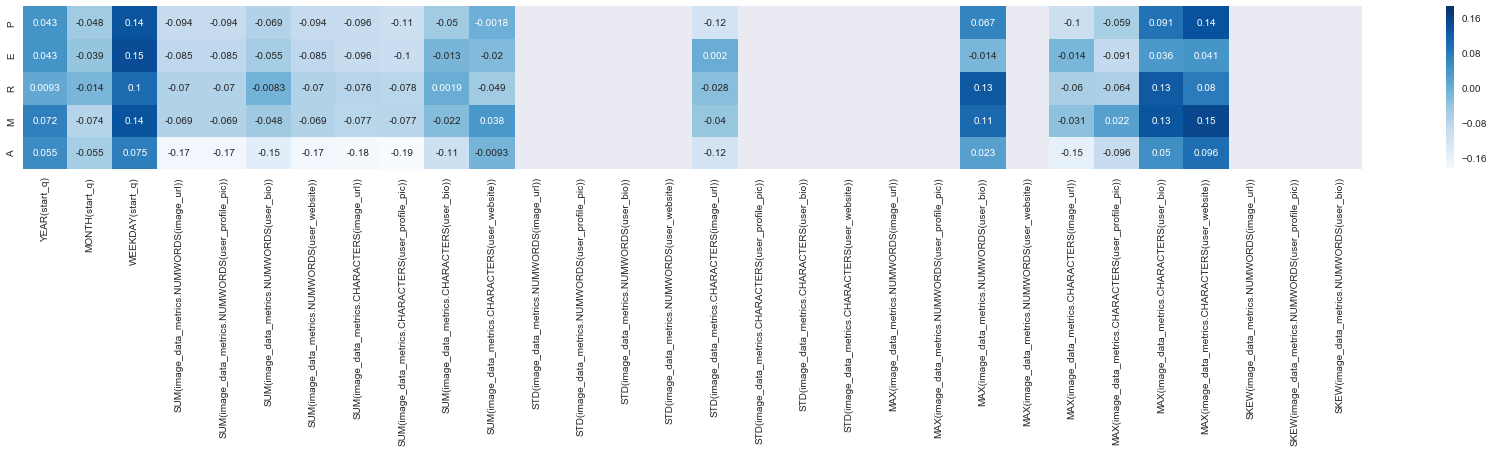

In [18]:
plt.figure(figsize=(30,3))

sns.heatmap(features.corr().loc[['P', 'E', 'R', 'M', 'A'], :].iloc[:,90:120], cmap='Blues', annot=True)

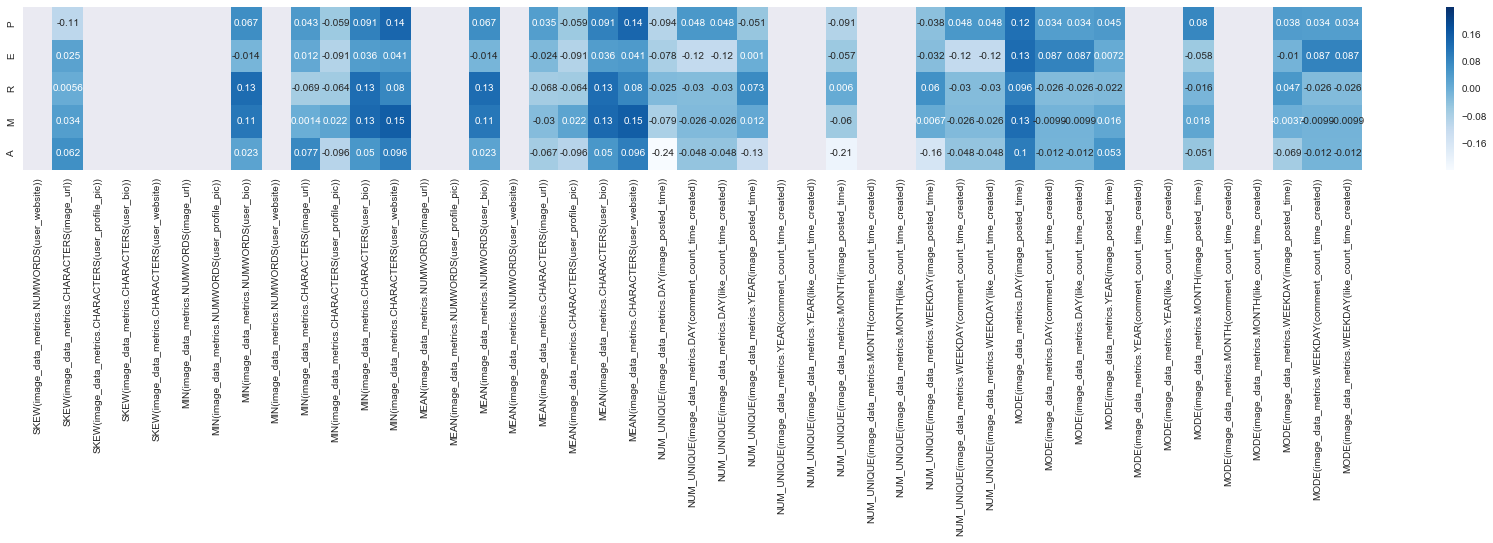

In [19]:
plt.figure(figsize=(30,3))

sns.heatmap(features.corr().loc[['P', 'E', 'R', 'M', 'A'], :].iloc[:,120:], cmap='Blues', annot=True)

In [20]:
df_significant_corr = features.corr().loc[['P', 'E', 'R', 'M', 'A'], :]

df_significant_corr = df_significant_corr.dropna(axis=1).drop('index', axis=1)

In [21]:
df_significant_corr.head()

,born,A_2,N_1,P_1,E_1,A_1,H_1,M_1,R_1,M_2,...,NUM_UNIQUE(image_data_metrics.WEEKDAY(comment_count_time_created)),NUM_UNIQUE(image_data_metrics.WEEKDAY(like_count_time_created)),MODE(image_data_metrics.DAY(image_posted_time)),MODE(image_data_metrics.DAY(comment_count_time_created)),MODE(image_data_metrics.DAY(like_count_time_created)),MODE(image_data_metrics.YEAR(image_posted_time)),MODE(image_data_metrics.MONTH(image_posted_time)),MODE(image_data_metrics.WEEKDAY(image_posted_time)),MODE(image_data_metrics.WEEKDAY(comment_count_time_created)),MODE(image_data_metrics.WEEKDAY(like_count_time_created))
P,-0.031295,0.532797,-0.391277,0.826868,0.330560,0.651153,0.559028,0.607577,0.479325,0.667748,...,0.048038,0.048038,0.119675,0.034200,0.034200,0.044677,0.079784,0.037726,0.034200,0.034200
E,-0.164748,0.442504,0.005289,0.416638,0.745403,0.517192,0.243480,0.363079,0.292088,0.504343,...,-0.115635,-0.115635,0.127711,0.087238,0.087238,0.007233,-0.057861,-0.009962,0.087238,0.087238
R,-0.082426,0.460560,-0.344243,0.509115,0.265531,0.481109,0.507381,0.517183,0.796884,0.693616,...,-0.029681,-0.029681,0.095990,-0.026189,-0.026189,-0.022495,-0.015521,0.046746,-0.026189,-0.026189
M,-0.027470,0.542107,-0.343973,0.552601,0.369661,0.730284,0.546829,0.816417,0.461270,0.870346,...,-0.025874,-0.025874,0.126520,-0.009873,-0.009873,0.015976,0.018261,-0.003716,-0.009873,-0.009873
A,-0.032063,0.807240,-0.360256,0.542811,0.501669,0.829654,0.539556,0.572099,0.390524,0.640617,...,-0.048350,-0.048350,0.099687,-0.012173,-0.012173,0.052643,-0.051237,-0.068915,-0.012173,-0.012173


In [22]:
df_significant_corr = df_significant_corr.loc[:, 'P':].drop(['PERMA', 'N_EMO', 'P_EMO'], axis=1)

In [23]:
df_data_p = features.loc[:, df_significant_corr.columns].drop(['E', 'R', 'M', 'A'], axis=1)

In [24]:
df_data_p.head()

,P,imagecount,SUM(image_data_metrics.image_height),SUM(image_data_metrics.image_width),SUM(image_data_metrics.data_memorability),SUM(image_data_metrics.user_followed_by),SUM(image_data_metrics.user_follows),SUM(image_data_metrics.user_posted_photos),SUM(image_data_metrics.comment_count),SUM(image_data_metrics.like_count),...,NUM_UNIQUE(image_data_metrics.WEEKDAY(comment_count_time_created)),NUM_UNIQUE(image_data_metrics.WEEKDAY(like_count_time_created)),MODE(image_data_metrics.DAY(image_posted_time)),MODE(image_data_metrics.DAY(comment_count_time_created)),MODE(image_data_metrics.DAY(like_count_time_created)),MODE(image_data_metrics.YEAR(image_posted_time)),MODE(image_data_metrics.MONTH(image_posted_time)),MODE(image_data_metrics.WEEKDAY(image_posted_time)),MODE(image_data_metrics.WEEKDAY(comment_count_time_created)),MODE(image_data_metrics.WEEKDAY(like_count_time_created))
insta_user_id,,,,,,,,,,,,,,,,,,,,,
1619510,3.000000,1515.0,950266.0,953636.0,1220.343579,556556.0,1244606.0,3114573.0,1183.0,10278.0,...,1.0,1.0,4.0,19.0,19.0,2012.0,4.0,6.0,0.0,0.0
2829661,7.666667,123.0,203260.0,201096.0,249.012550,63756.0,92736.0,39928.0,120.0,2299.0,...,1.0,1.0,28.0,19.0,19.0,2011.0,5.0,6.0,0.0,0.0
3069744,4.666667,350.0,211612.0,212332.0,283.515559,106051.0,81840.0,119350.0,745.0,4600.0,...,1.0,1.0,2.0,19.0,19.0,2013.0,10.0,6.0,0.0,0.0
3988856,10.000000,609.0,378994.0,379136.0,512.292704,445788.0,574287.0,371490.0,780.0,6074.0,...,1.0,1.0,6.0,19.0,19.0,2013.0,5.0,2.0,0.0,0.0
4185084,6.333333,64.0,22703.0,23956.0,28.091945,912.0,2470.0,2432.0,30.0,208.0,...,1.0,1.0,31.0,19.0,19.0,2015.0,7.0,6.0,0.0,0.0


In [25]:
df_data_p = df_data_p.dropna()

In [26]:
df_data_p.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1619510 to 4249629173
Data columns (total 94 columns):
P                                                                     143 non-null float64
imagecount                                                            143 non-null float64
SUM(image_data_metrics.image_height)                                  143 non-null float64
SUM(image_data_metrics.image_width)                                   143 non-null float64
SUM(image_data_metrics.data_memorability)                             143 non-null float64
SUM(image_data_metrics.user_followed_by)                              143 non-null float64
SUM(image_data_metrics.user_follows)                                  143 non-null float64
SUM(image_data_metrics.user_posted_photos)                            143 non-null float64
SUM(image_data_metrics.comment_count)                                 143 non-null float64
SUM(image_data_metrics.like_count)                             

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [114]:
x_train, x_test, y_train, y_test = train_test_split(df_data_p.drop('P', axis=1), df_data_p.P, test_size=0.2, random_state=1)

In [115]:
model = GradientBoostingRegressor()

In [116]:
model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [117]:
pred = model.predict(x_test)

In [118]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

In [119]:
print(mse)

2.44248185051


In [120]:
print(mae)

1.27379989261


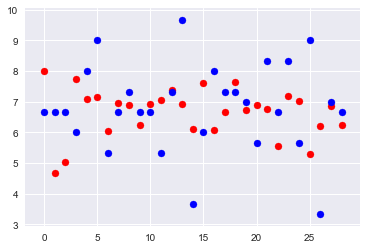

In [121]:
plt.scatter(range(0, len(pred)), pred, color='red')
plt.scatter(range(0, len(y_test)), y_test, color='blue')

In [103]:
features.P.describe()

count    159.000000
mean       6.670860
std        1.690125
min        1.666667
25%        5.666667
50%        6.666667
75%        8.000000
max       10.000000
Name: P, dtype: float64

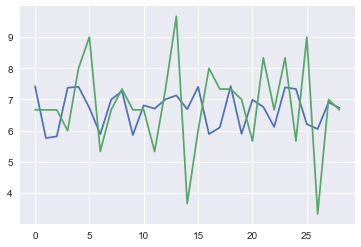

In [104]:
plt.plot(range(0, len(pred)), pred)
plt.plot(range(0, len(y_test)), y_test)

In [105]:
model.feature_importances_

array([ 0.01101542,  0.05212987,  0.0373292 ,  0.04882512,  0.03533074,
        0.0790532 ,  0.03080046,  0.00342778,  0.05422089,  0.03552197,
        0.04113352,  0.04729955,  0.02838908,  0.08039394,  0.06462051,
        0.02400698,  0.06578788,  0.03382111,  0.04201245,  0.03082126,
        0.07434571,  0.03402206,  0.02625947,  0.01943182])

In [106]:
df = pd.DataFrame(data={'features': x_train.columns, 'importances': model.feature_importances_})

In [109]:
df.sort_values('importances', ascending=False)

,features,importances
13,MIN(image_data_metrics.image_height),0.080394
5,MAX(image_data_metrics.data_memorability),0.079053
20,STD(image_data_metrics.CHARACTERS(image_url)),0.074346
16,MEAN(image_data_metrics.image_height),0.065788
14,MIN(image_data_metrics.data_memorability),0.064621
8,SKEW(image_data_metrics.image_height),0.054221
1,SUM(image_data_metrics.user_follows),0.052130
3,SUM(image_data_metrics.like_count),0.048825
11,SKEW(image_data_metrics.comment_count),0.047300
18,MEAN(image_data_metrics.comment_count),0.042012


In [110]:
df.importances.describe()

count    24.000000
mean      0.041667
std       0.020322
min       0.003428
25%       0.030198
50%       0.036426
75%       0.052653
max       0.080394
Name: importances, dtype: float64

In [111]:
drop_columns = df[df.importances < 0.03].features

In [112]:
df_data_p = df_data_p.drop(drop_columns, axis=1)